# MFE analysis of model predictions

We inspect the models' ability to recapitulate structure of target sequences 

In [124]:
import pandas as pd
import numpy as np
import subprocess
from scipy.stats import spearmanr,pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [9]:
def calculate_MFEs(arr):
    '''
      Given list of sequence strings, return the MFE values of the first 36 nucleotides for each sequence as a list. 
      
      Args:
          arr: a list of strings which are the nucleotide sequences
          
      Returns:
          list of MFE values for each sequence for the first 36 nucleotides. Sequences shorter than 36 are not included
    '''
    
    mfes = []
    for i in range(len(arr)):
        seq = arr[i]
        if (len(seq) > 36):
            seq = seq[:36]
            
        text_file = open("input.txt", "w")
        text_file.write(seq)
        text_file.close()
        
        process = subprocess.Popen(["RNAFold", "input.txt"], stdout=subprocess.PIPE)
        out, err = process.communicate()
        out = out.decode('utf8')
        mfes.append(float(out[out.rfind("(")+1: out.rfind(")")]))
        
    return mfes

## Human HEG 

In [158]:
# import data for human HEGs
human_targets = pd.read_csv("../outputs/predictions/human_test_split_lang.txt", header=None).iloc[:, 0]
human_unigram = pd.read_csv("../outputs/predictions/human_heg_unigram.txt", header=None).iloc[:, 0]
human_trigram = pd.read_csv("../outputs/predictions/human_heg_trigram.txt", header=None).iloc[:, 0]
human_fivegram = pd.read_csv("../outputs/predictions/human_heg_fivegram.txt", header=None).iloc[:, 0]
human_ngram = pd.read_csv("../outputs/predictions/human_heg_ngram.txt", header=None).iloc[:, 0]
human_rnn = pd.read_csv("../outputs/predictions/human_bilstm_rnn_output.txt", header=None).iloc[:, 0]

In [160]:
human_target_MFEs = calculate_MFEs(human_targets)
human_unigram_MFEs = calculate_MFEs(human_unigram)
human_trigram_MFEs = calculate_MFEs(human_trigram)
human_fivegram_MFEs = calculate_MFEs(human_fivegram)
human_ngram_MFEs = calculate_MFEs(human_ngram)
human_rnn_MFEs = calculate_MFEs(human_rnn)

In [133]:
spearmanr(human_target_MFEs, human_unigram_MFEs)

SpearmanrResult(correlation=0.5623749383292735, pvalue=4.2668280073665565e-64)

In [134]:
spearmanr(human_target_MFEs, human_trigram_MFEs)

SpearmanrResult(correlation=0.5917149119362295, pvalue=2.0613022250853502e-72)

In [135]:
spearmanr(human_target_MFEs, human_fivegram_MFEs)

SpearmanrResult(correlation=0.5809919087943494, pvalue=2.8285696145008666e-69)

In [136]:
spearmanr(human_target_MFEs, human_ngram_MFEs)

SpearmanrResult(correlation=0.5837835290595195, pvalue=4.425880562003618e-70)

In [137]:
spearmanr(human_target_MFEs, human_rnn_MFEs)

SpearmanrResult(correlation=0.6387683962697631, pvalue=1.1055023407124692e-87)

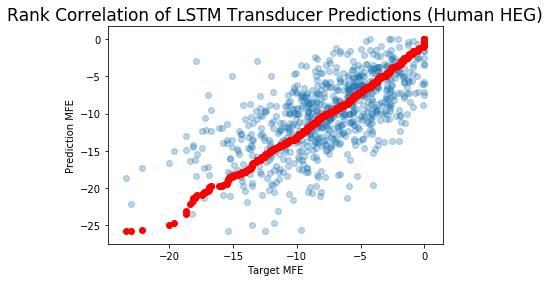

In [26]:
plt.scatter(human_target_MFEs, human_rnn_MFEs, alpha=0.3)
plt.scatter(sorted(human_target_MFEs), sorted(human_rnn_MFEs), c="red")
plt.xlabel("Target MFE")
plt.ylabel("Prediction MFE")

plt.title("Rank Correlation of LSTM Transducer Predictions (Human HEG)", fontsize=17)
plt.show()

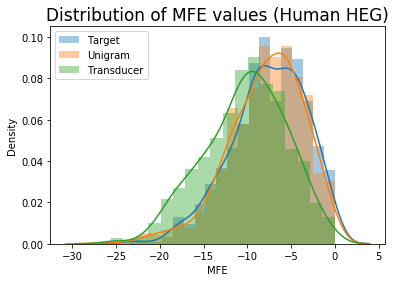

In [9]:
sns.distplot(human_target_MFEs, label="Target")
sns.distplot(human_unigram_MFEs, label="Unigram")
sns.distplot(human_rnn_MFEs, label="Transducer")
plt.legend()
plt.xlabel("MFE")
plt.ylabel("Density")
plt.title("Distribution of MFE values (Human HEG)", fontsize=17)
plt.show()

## E. coli HEGs

In [148]:
# import data for E. coli HEGs

ecoli_targets = pd.read_csv("../outputs/predictions/ecoli_heg_test_iterator_baseline.txt", header=None).iloc[:, 0]
ecoli_unigram = pd.read_csv("../outputs/predictions/ecoli_heg_unigram.txt", header=None).iloc[:, 0]
ecoli_trigram = pd.read_csv("../outputs/predictions/ecoli_heg_trigram.txt", header=None).iloc[:, 0]
ecoli_fivegram = pd.read_csv("../outputs/predictions/ecoli_heg_fivegram.txt", header=None).iloc[:, 0]
ecoli_ngram = pd.read_csv("../outputs/predictions/ecoli_heg_ngram.txt", header=None).iloc[:, 0]
ecoli_rnn = pd.read_csv("../outputs/predictions/ecoli_heg_rnn_bilstm_output.txt", header=None).iloc[:, 0]

In [149]:
def seq_to_triplet(seq):
    return [(seq[i:i+3]) for i in range(0, len(seq), 3)] 

def seqlist_to_triplets(seqs_NT):
    ''' returns list of list of codons given list of NT sequences

        Args:
            list(str): NT sequences

        Returns:
            list(list(str)): list of list of codons
    '''
    return [seq_to_triplet(seq) for seq in seqs_NT]


In [150]:
ecoli_target_MFEs = calculate_MFEs(ecoli_targets)
ecoli_unigram_MFEs = calculate_MFEs(ecoli_unigram)
ecoli_trigram_MFEs = calculate_MFEs(ecoli_trigram)
ecoli_fivegram_MFEs = calculate_MFEs(ecoli_fivegram)
ecoli_ngram_MFEs = calculate_MFEs(ecoli_ngram)
ecoli_rnn_MFEs = calculate_MFEs(ecoli_rnn)

In [153]:
spearmanr(ecoli_target_MFEs, ecoli_unigram_MFEs)

SpearmanrResult(correlation=0.4321850697380756, pvalue=0.0017231023622091295)

In [154]:
spearmanr(ecoli_target_MFEs, ecoli_ngram_MFEs)

SpearmanrResult(correlation=0.5226038968523596, pvalue=9.893376687700307e-05)

In [155]:
spearmanr(ecoli_target_MFEs, ecoli_trigram_MFEs)

SpearmanrResult(correlation=0.620911012949728, pvalue=1.5035494518965348e-06)

In [157]:
spearmanr(ecoli_target_MFEs, ecoli_fivegram_MFEs)

SpearmanrResult(correlation=0.4075915917092131, pvalue=0.0033038168650679754)

In [156]:
spearmanr(ecoli_target_MFEs, ecoli_rnn_MFEs)

SpearmanrResult(correlation=0.5838979392642636, pvalue=8.540981396101229e-06)

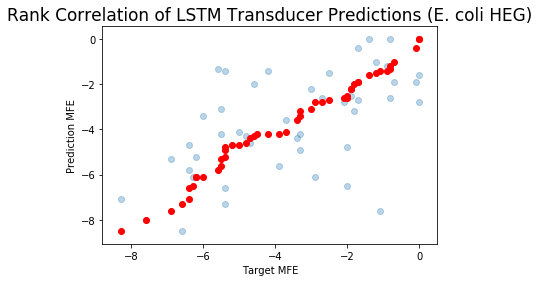

In [31]:
plt.scatter(ecoli_target_MFEs, ecoli_rnn_MFEs, alpha=0.3)
plt.scatter(sorted(ecoli_target_MFEs), sorted(ecoli_rnn_MFEs), c="red")
plt.xlabel("Target MFE")
plt.ylabel("Prediction MFE")

plt.title("Rank Correlation of LSTM Transducer Predictions (E. coli HEG)", fontsize=17)
plt.show()

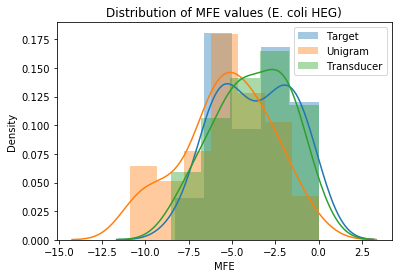

In [32]:
sns.distplot(ecoli_target_MFEs, label="Target")
sns.distplot(ecoli_unigram_MFEs, label="Unigram")
sns.distplot(ecoli_rnn_MFEs, label="Transducer")
plt.legend()
plt.xlabel("MFE")
plt.ylabel("Density")
plt.title("Distribution of MFE values (E. coli HEG)")
plt.show()